# clustering_market segmentation

In [15]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [16]:
#load th data
raw_data=pd.read_csv("D:\\tala\\data science projects\\dr.fozouni\\23- Marker_Segmentation.csv")
raw_data.head()

,satisfaction,loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


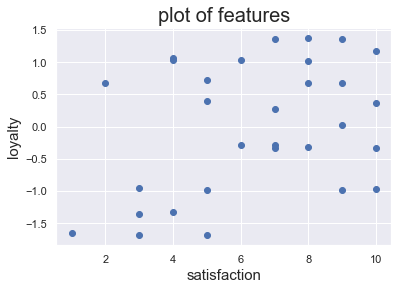

In [17]:
plt.scatter(raw_data["satisfaction"] , raw_data["loyalty"])

plt.title("plot of features" , size=20)

plt.xlabel("satisfaction" , size=15)
plt.ylabel("loyalty" , size=15)

plt.show()

# select the features

In [18]:
x=raw_data.copy()

kmeans=KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

# results

In [19]:
clusters=x.copy()
clusters["cluster_prediction"]=kmeans.fit_predict(x)
clusters.head()

,satisfaction,loyalty,cluster_prediction
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,3
3,7,-0.29,0
4,4,1.06,3


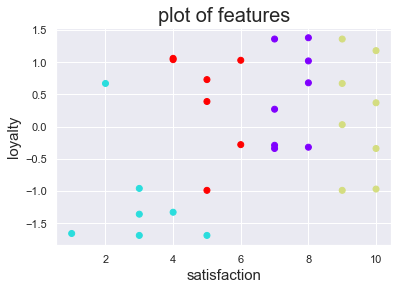

In [20]:
plt.scatter(clusters["satisfaction"] ,clusters["loyalty"] , c=clusters["cluster_prediction"] , cmap="rainbow")

plt.title("plot of features" , size=20)

plt.xlabel("satisfaction" , size=15)
plt.ylabel("loyalty" , size=15)

plt.show()

# standardizing the variables

In [21]:
from sklearn import preprocessing

In [22]:
x_scaled=preprocessing.scale(x)
x_scaled=pd.DataFrame(x_scaled , columns=["satisfaction_scaled" , "loyalty_scaled"])
x_scaled.head()                                          

,satisfaction_scaled,loyalty_scaled
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645


In [23]:
kmeans2=KMeans(4)
kmeans2.fit(x_scaled)

KMeans(n_clusters=4)

In [24]:
new_x_scaled=x_scaled.copy()
new_x_scaled["cluster_pred_scaled"]=kmeans2.fit_predict(x_scaled)
new_x_scaled.head()

,satisfaction_scaled,loyalty_scaled,cluster_pred_scaled
0,-0.931381,-1.331811,0
1,-0.155230,-0.281171,1
2,-0.543305,-0.991604,0
3,0.232845,-0.291177,1
4,-0.931381,1.059645,2


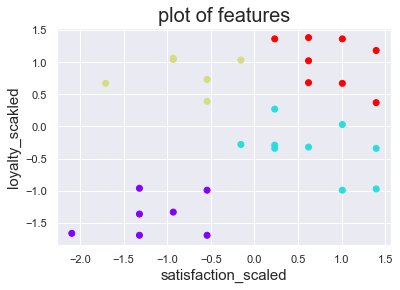

In [25]:
plt.scatter(new_x_scaled["satisfaction_scaled"] ,new_x_scaled["loyalty_scaled"] , c=new_x_scaled["cluster_pred_scaled"] , cmap="rainbow")

plt.title("plot of features" , size=20)

plt.xlabel("satisfaction_scaled" , size=15)
plt.ylabel("loyalty_scakled" , size=15)

plt.show()

# applyingthe elbow method

In [28]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss ,columns=["wcss"])

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,wcss
0,60.000000
1,29.818973
2,17.913350
3,10.247182
4,7.792695
5,6.549837
6,5.348079
7,4.434310
8,3.821727


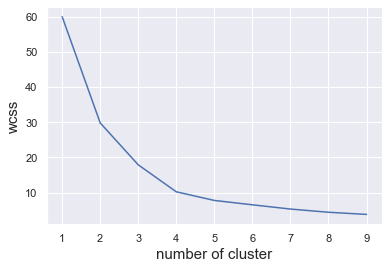

In [29]:
plt.plot(range(1,10) , wcss)

plt.xlabel("number of cluster" , size=15)
plt.ylabel("wcss" ,size=15)

plt.show()

# select the number of clusters

In [34]:
kmeans_new=KMeans(5)
kmeans_new.fit(x_scaled)

clusters_new=x_scaled.copy()
clusters_new["cluster_pred"]=kmeans_new.fit_predict(x_scaled)

In [35]:
clusters_new

,satisfaction_scaled,loyalty_scaled,cluster_pred
0,-0.931381,-1.331811,1
1,-0.155230,-0.281171,2
2,-0.543305,-0.991604,1
3,0.232845,-0.291177,2
4,-0.931381,1.059645,3
5,-2.095606,-1.662012,1
6,1.397071,-0.971592,4
7,0.620920,-0.321196,2
8,0.620920,1.019621,0
9,0.620920,0.679414,0


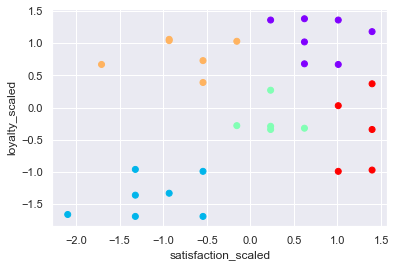

In [36]:
plt.scatter(clusters_new["satisfaction_scaled"] ,clusters_new["loyalty_scaled"] , c=clusters_new["cluster_pred"] ,cmap="rainbow")

plt.xlabel("satisfaction_scaled")
plt.ylabel("loyalty_scaled")

plt.show()